In [26]:
import pandas as pd
## plotting libraries
from matplotlib import pyplot as plt
## Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,  ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
%matplotlib inline 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score,f1_score,confusion_matrix
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder

In [27]:
df= pd.read_csv("DATA_Customer-Churn.csv")

In [28]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


Check the datatypes of all the columns in the data. You will see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [30]:
df = df.replace('^\s*$',np.nan, regex = True)

In [31]:
df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7032 non-null   float64
 15  Churn             7043 non-null   object 
dtypes: float64(2), int64(2), object(12)
memory

In [44]:
#pd.to_numeric(df["TotalCharges"], downcast='float',errors= "coerce")

### Check for null values in the dataframe. Replace the null values.

In [35]:
df.isnull().any()

gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [36]:
df.isnull().any().value_counts()

False    15
True      1
dtype: int64

In [37]:
df["gender"].isnull().any().sum()

0

### Defining a new data

In [46]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df01= pd.DataFrame(df[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges","Churn"]])

In [48]:
df01

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,No
1,34,0,56.95,1889.50,No
2,2,0,53.85,108.15,Yes
3,45,0,42.30,1840.75,No
4,2,0,70.70,151.65,Yes
...,...,...,...,...,...
7038,24,0,84.80,1990.50,No
7039,72,0,103.20,7362.90,No
7040,11,0,29.60,346.45,No
7041,4,1,74.40,306.60,Yes


### Changing the values from categorical to numerical

In [49]:
df01["Churn"] = df01["Churn"].apply(lambda x: x.replace('No', '0') if type(x) == str else x)
df01["Churn"] = df01["Churn"].apply(lambda x: x.replace('Yes', '1') if type(x) == str else x)

In [50]:
df01['Churn']=df01['Churn'].astype(int) 

In [51]:
df01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   SeniorCitizen   7043 non-null   int64  
 2   MonthlyCharges  7043 non-null   float64
 3   TotalCharges    7032 non-null   float64
 4   Churn           7043 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 247.7 KB


In [52]:
df01['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [53]:
df01

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


###  Checking for null values in the dataframe. Replace the null values.

In [54]:
df01.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
TotalCharges      float64
Churn               int32
dtype: object

In [63]:
df01.isnull().sum()

tenure             0
SeniorCitizen      0
MonthlyCharges     0
TotalCharges      11
Churn              0
dtype: int64

In [65]:
df01['TotalCharges'] = df01['TotalCharges'].fillna((df01['TotalCharges'].mean()))

In [66]:
df01.isnull().sum()

tenure            0
SeniorCitizen     0
MonthlyCharges    0
TotalCharges      0
Churn             0
dtype: int64

### Defining the variables

In [67]:
X= df01[["tenure","SeniorCitizen","MonthlyCharges","TotalCharges"]]
y=df01[["Churn"]]

### Splitting the variables

In [68]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

### Scaler

In [70]:
scaler = MinMaxScaler()
scaler.fit(X_train)


X_scaler_train= scaler.transform(X_train)

X_scaler_test= scaler.transform(X_test)

### Logistic Model

In [71]:
log_model = LogisticRegression() 


trans = PowerTransformer()

trans.fit(X_train)

#X_train_mod = trans.transform(X_train)
#X_test_mod  = trans.transform(X_test)

log_model.fit(X_train, y_train)


y_pred_train_log = log_model.predict(X_train)
y_pred_test_log = log_model.predict(X_test)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)


C:\Users\espan\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Error_metric,Train,Test
0,Accuracy,0.789670,0.797019
1,Precision,0.648833,0.674242
2,Recall,0.447351,0.470899


### Confussion Matrix

### Train Data

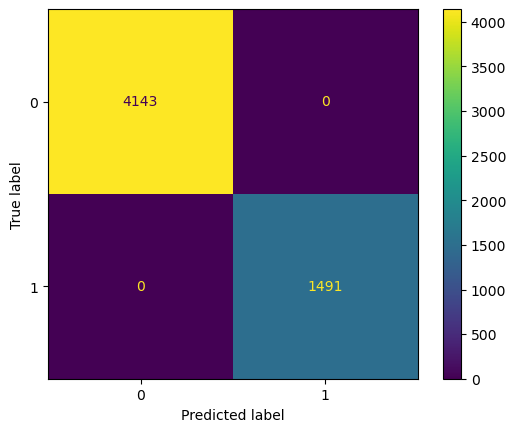

In [73]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_train = confusion_matrix(y_train,y_train, labels = log_model.classes_)

disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

### KNN Classification

In [74]:
df02 = pd.DataFrame(df01)

In [75]:
df02

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges,Churn
0,1,0,29.85,29.85,0
1,34,0,56.95,1889.50,0
2,2,0,53.85,108.15,1
3,45,0,42.30,1840.75,0
4,2,0,70.70,151.65,1
...,...,...,...,...,...
7038,24,0,84.80,1990.50,0
7039,72,0,103.20,7362.90,0
7040,11,0,29.60,346.45,0
7041,4,1,74.40,306.60,1


In [81]:
TT_SPLIT = 0.2     # ratio train/test size
RAND_STATE = 123   # specifies a sampling for repeatable results

In [97]:
X_train_knn, X_test_knn, y_train_knn, y_test_knn=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

scaler = MinMaxScaler()
scaler.fit(X_train_knn)


X_scaler_train_knn= scaler.transform(X_train_knn)

X_scaler_test_knn= scaler.transform(X_test_knn)



### Scaler

In [102]:
scaler_knn = StandardScaler()
X_train_scaled_knn = scaler_knn.fit_transform(X_train_knn)
X_test_scaled_knn = scaler_knn.transform(X_test_knn)

In [107]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model

model.fit(X_train_scaled_knn, y_train_knn) # train model


y_pred_knn = model.predict(X_test_scaled_knn) # predict test

y_pred_train_knn=model.predict(X_train_scaled_knn) # predict train (for sanity checks)
#model.predict_proba(inputdata)





C:\Users\espan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,Error_metric,Train,Test
0,Accuracy,0.861200,0.760823
1,Precision,0.771765,0.586626
2,Recall,0.667119,0.489848


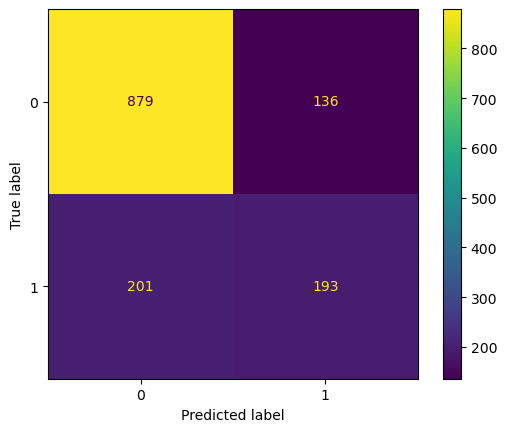

In [108]:
cm = confusion_matrix(y_test_knn, y_pred_knn, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()


performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train_knn, y_pred_train_knn),
                                         precision_score(y_train_knn, y_pred_train_knn),
                                         recall_score(y_train_knn, y_pred_train_knn)],
                               'Test': [accuracy_score(y_test, y_pred_knn),
                                        precision_score(y_test, y_pred_knn),
                                        recall_score(y_test, y_pred_knn)]})

display(performance_log)

In [109]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# Initialize an empty list to store the classification reports
reports = []

# Iterate over the range of n_neighbors
for n in range(1, 21):
    # Create the KNN classifier model
    model = KNeighborsClassifier(n_neighbors=n, weights='uniform')

    # Train the model
    model.fit(X_train_knn, y_train_knn)

    # Predict the test data
    y_pred_knn = model.predict(X_test_knn)

    # Generate the classification report
    report = classification_report(y_test_knn, y_pred_knn)

    # Append the classification report to the list
    reports.append((n, report))

# Display the classification reports for each n_neighbors value
for n, report in reports:
    print(f"n_neighbors = {n}\n{report}\n")


# Round 2

### Fit a Decision Tree Classifier on the training data
###  Check the accuracy on the test data

### Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer, fetch_california_housing
#from sklearn.datasets import load_boston
#from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import warnings
warnings.filterwarnings('ignore')

### Loading a dataset for classification

In [111]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#from sklearn.metrics import plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 

model = DecisionTreeClassifier(max_depth=3)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)



### Performance

In [112]:

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.787018,0.778514
1,Precision,0.647904,0.662500
2,Recall,0.417116,0.370629


### Confussion Matrix

### Train Data

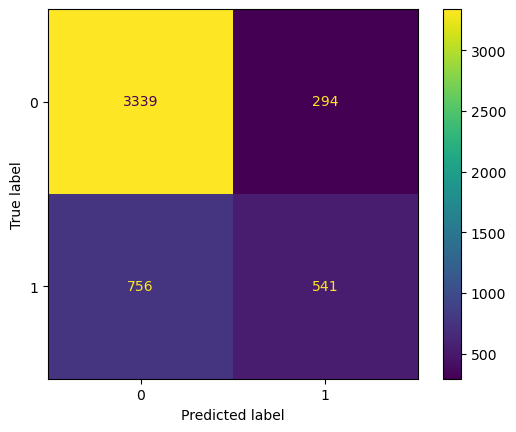

In [116]:
cm = confusion_matrix(y_train, y_pred_train_dt, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Test n Data

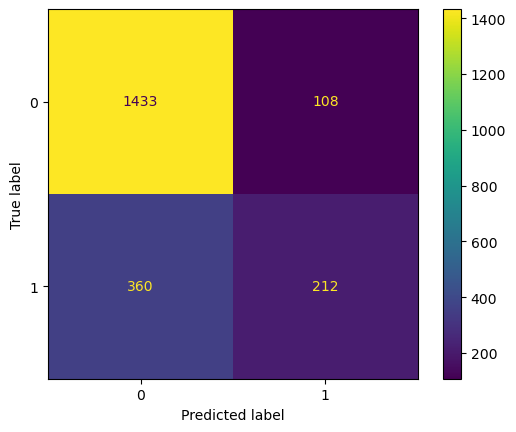

In [117]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels = model.classes_)

disp = ConfusionMatrixDisplay(cm)
disp.plot()

### Features Importance

In [119]:
df01["tenure"]

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

<BarContainer object of 4 artists>

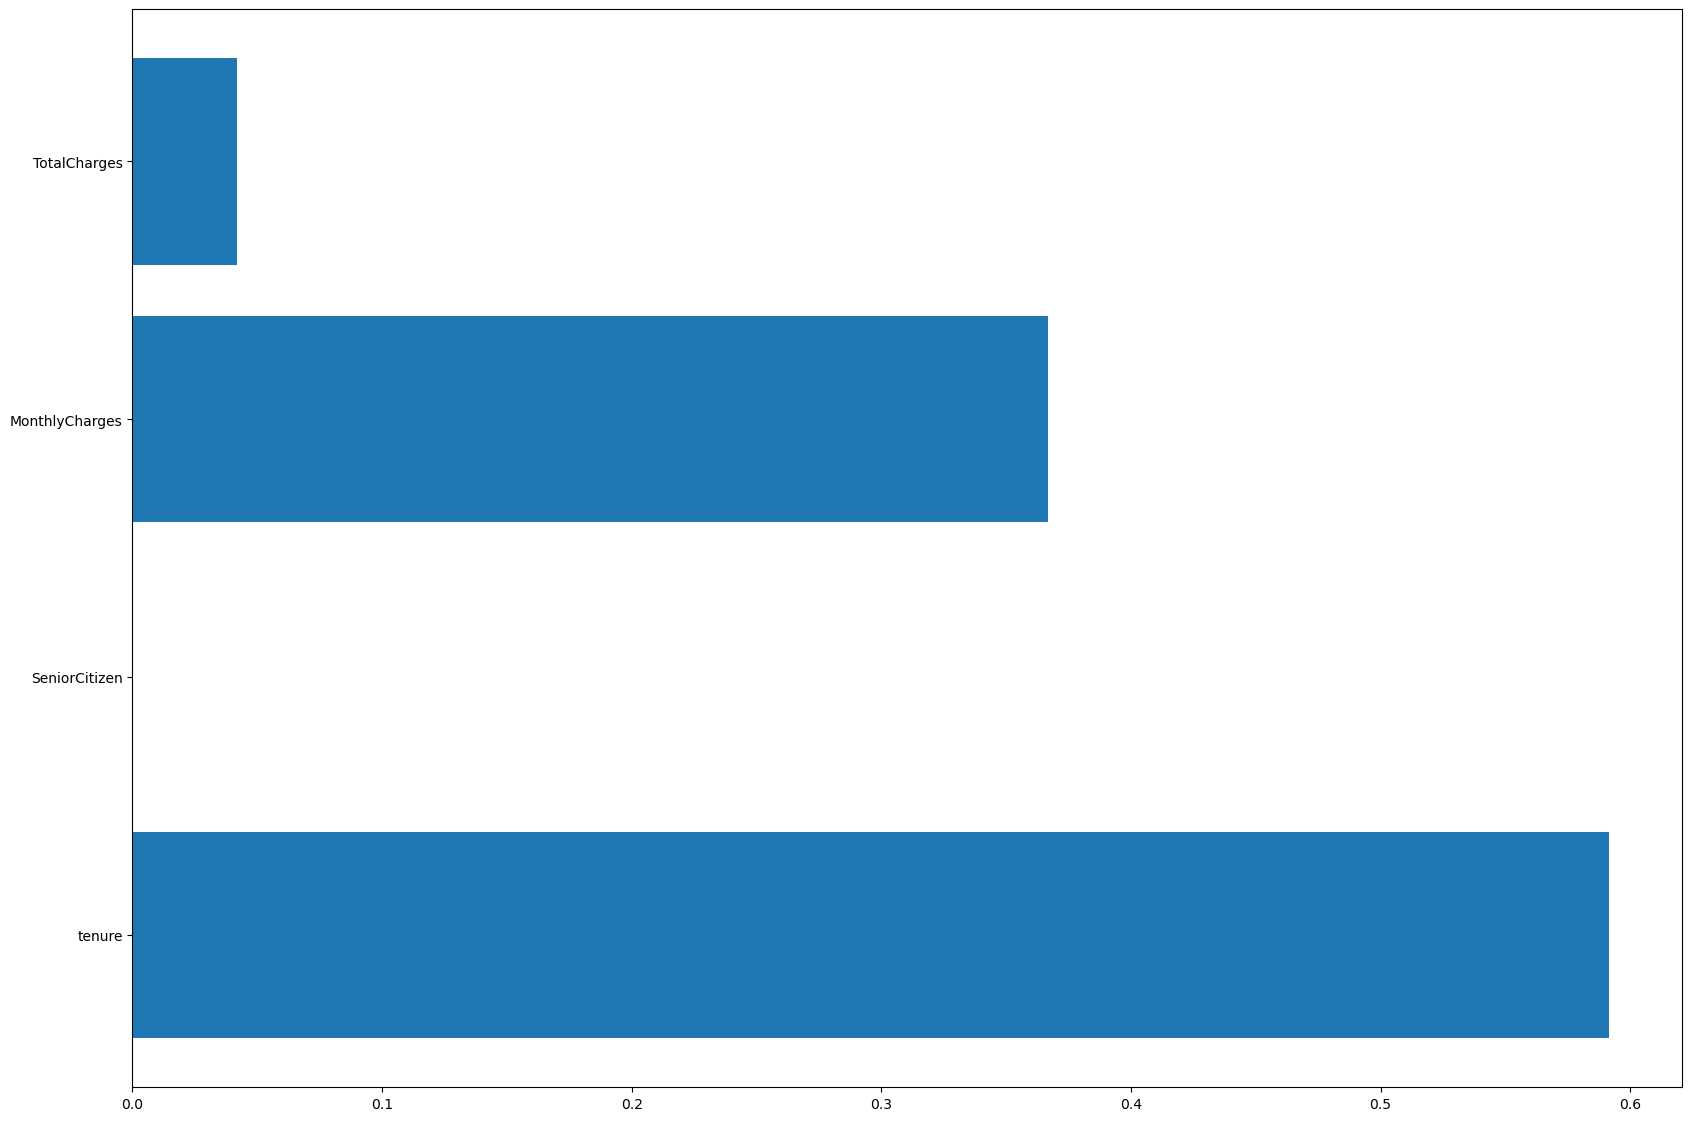

In [114]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

### Decision Tree

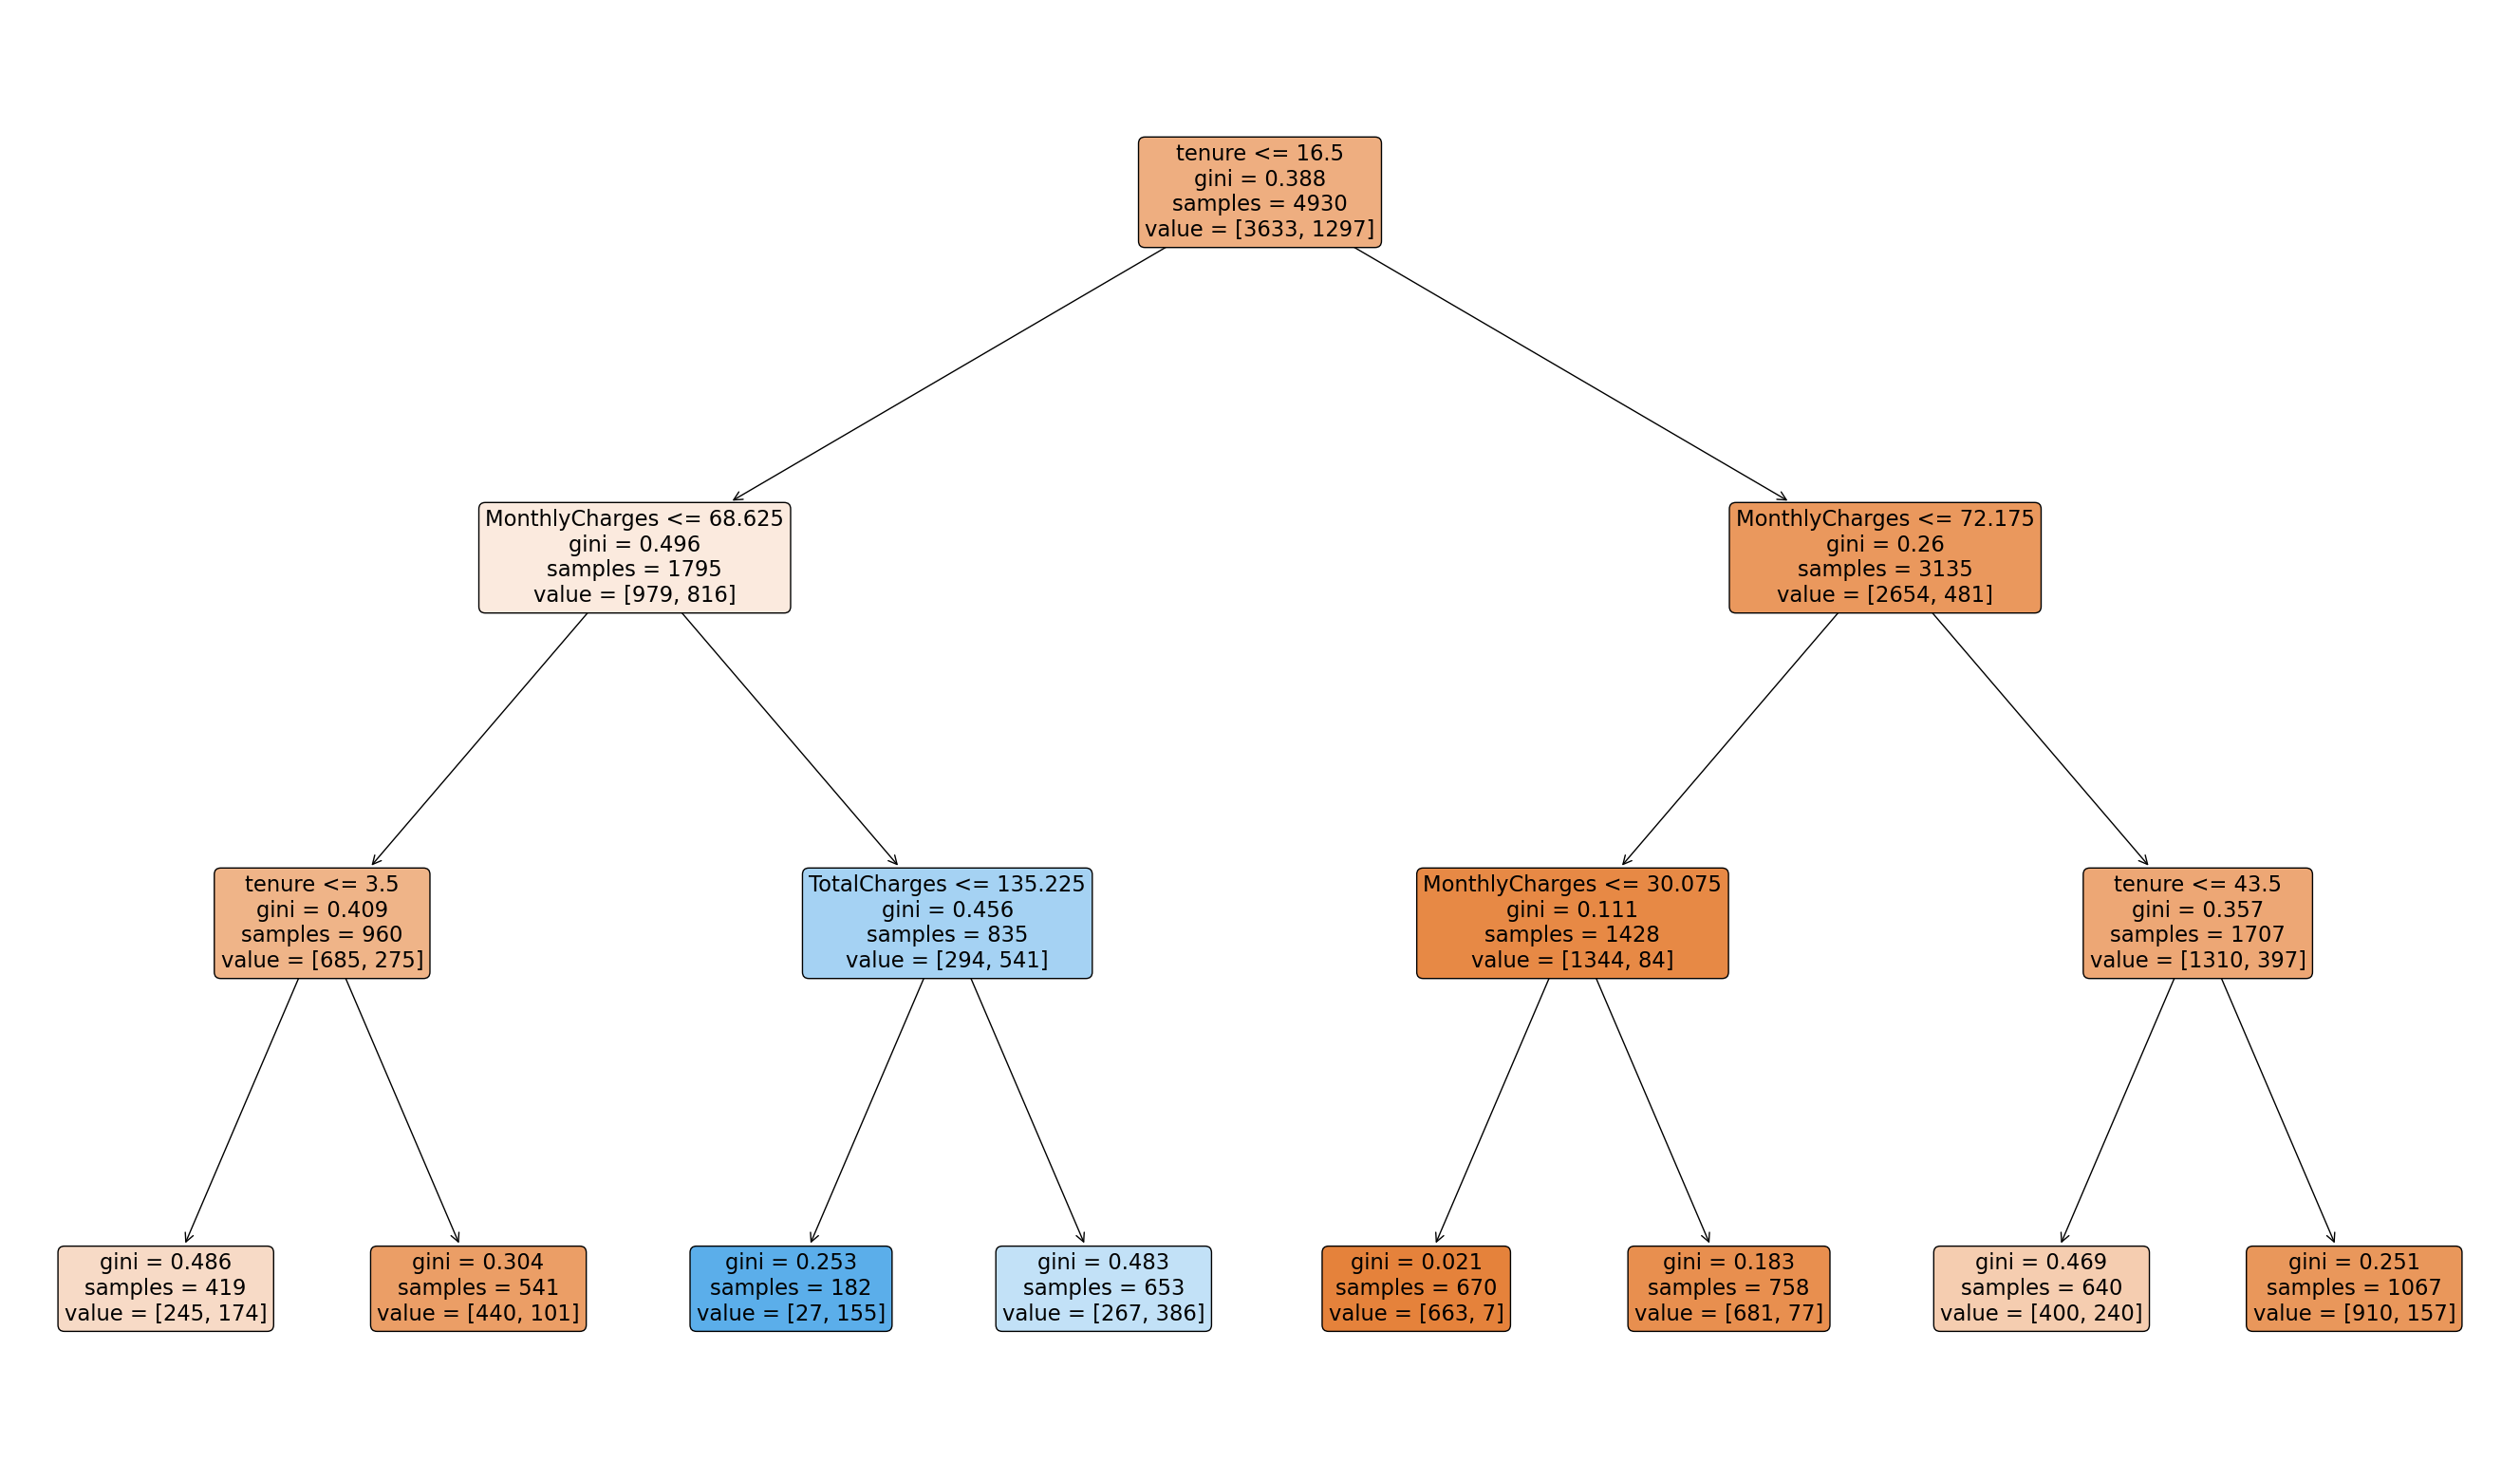

In [115]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 